In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
import sklearn

sklearn.__version__

'0.22.2.post1'

In [82]:
player1=pd.read_csv('Players1.csv')
player1.describe()
player1.info()
player1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5964 entries, 0 to 5963
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           5964 non-null   object 
 1   Overall Score    5964 non-null   int64  
 2   Potential Score  5964 non-null   int64  
 3   Market Value     5851 non-null   float64
 4   Weekly Salary    5851 non-null   float64
 5   Height           5964 non-null   int64  
 6   Weight           5964 non-null   int64  
 7   Age              5964 non-null   int64  
 8   Preferred Foot   5964 non-null   object 
 9   Ball Skills      5964 non-null   float64
 10  Defence          5964 non-null   float64
 11  Mental           5964 non-null   float64
 12  Passing          5964 non-null   float64
 13  Physical         5964 non-null   float64
 14  Shooting         5964 non-null   float64
 15  Goalkeeping      5964 non-null   float64
dtypes: float64(9), int64(5), object(2)
memory usage: 792.1+ KB


,Player,Overall Score,Potential Score,Market Value,Weekly Salary,Height,Weight,Age,Preferred Foot,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
0,Lionel Messi,94,94,95500000.0,560000.0,170,72,33,Left,96.5,32.000000,77.833333,90.666667,82.000000,86.875,10.8
1,Cristiano Ronaldo,93,93,58500000.0,400000.0,187,83,35,Right,90.5,28.000000,76.666667,81.333333,85.000000,87.500,11.6
2,Neymar Jr,92,92,105500000.0,290000.0,175,68,28,Right,95.5,31.333333,75.000000,85.000000,79.142857,83.750,11.8
3,Virgil van Dijk,91,92,90000000.0,245000.0,193,92,29,Right,73.5,90.666667,77.333333,71.666667,74.857143,65.125,11.6
4,Jan Oblak,91,93,77500000.0,125000.0,188,87,27,Right,21.0,19.000000,47.500000,32.000000,59.428571,18.500,87.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,Kyle Beckerman,70,70,275000.0,3200.0,177,70,38,Right,65.5,67.666667,66.000000,61.333333,55.857143,61.875,11.8
5960,Mohamed Tijani,69,79,1500000.0,5300.0,188,91,23,Right,51.5,68.000000,56.666667,46.333333,67.142857,33.125,12.4
5961,David Zima,69,82,1700000.0,2100.0,190,80,19,Right,61.5,67.000000,57.833333,53.666667,62.285714,44.125,10.0
5962,Róbert Boženík,69,81,1800000.0,4300.0,188,81,20,Right,67.5,28.000000,56.166667,59.333333,70.714286,60.625,10.2


In [83]:
player1.describe()

,Overall Score,Potential Score,Market Value,Weekly Salary,Height,Weight,Age,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
count,5964.000000,5964.00000,5.851000e+03,5851.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,74.026492,76.38548,6.844555e+06,24570.705862,181.473005,76.200201,27.947015,65.237508,52.447183,62.672451,61.912978,67.950680,55.875755,16.381321
std,3.761233,4.76749,8.493833e+06,32569.006291,6.861299,7.168148,4.130182,17.077144,22.035056,9.936667,14.497314,8.962494,15.265435,18.232423
min,69.000000,70.00000,1.000000e+03,1500.000000,158.000000,55.000000,17.000000,7.500000,9.000000,25.166667,10.000000,25.428571,12.625000,1.000000
25%,71.000000,73.00000,2.500000e+06,8600.000000,177.000000,71.000000,25.000000,63.000000,31.333333,59.000000,57.666667,64.428571,48.500000,9.800000
50%,73.000000,75.00000,4.200000e+06,15000.000000,182.000000,76.000000,28.000000,70.500000,62.666667,64.500000,66.000000,69.857143,60.375000,10.800000
75%,76.000000,80.00000,8.000000e+06,27500.000000,186.000000,81.000000,31.000000,75.000000,71.333333,69.000000,71.000000,73.857143,66.625000,12.000000
max,94.000000,95.00000,1.055000e+08,560000.000000,201.000000,104.000000,42.000000,96.500000,90.666667,85.666667,92.333333,87.285714,87.500000,87.800000


In [84]:
player1.isna().sum()

Player               0
Overall Score        0
Potential Score      0
Market Value       113
Weekly Salary      113
Height               0
Weight               0
Age                  0
Preferred Foot       0
Ball Skills          0
Defence              0
Mental               0
Passing              0
Physical             0
Shooting             0
Goalkeeping          0
dtype: int64

In [85]:
player=player1.dropna()

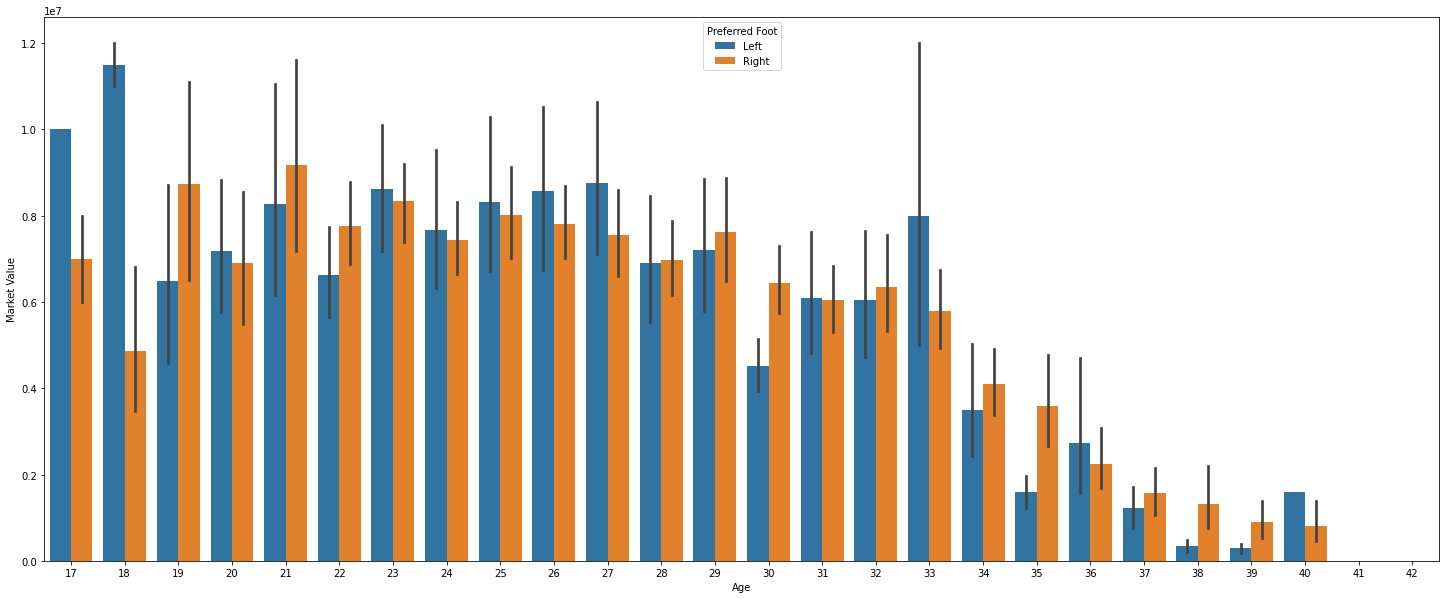

In [86]:
plt.figure(figsize=[25,10])
sns.barplot(x='Age', y='Market Value', data=player, hue='Preferred Foot')

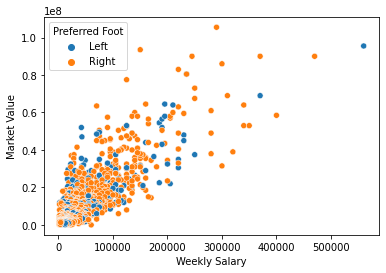

In [87]:
plt.figure()
sns.scatterplot(x='Weekly Salary', y='Market Value',data=player,hue='Preferred Foot')

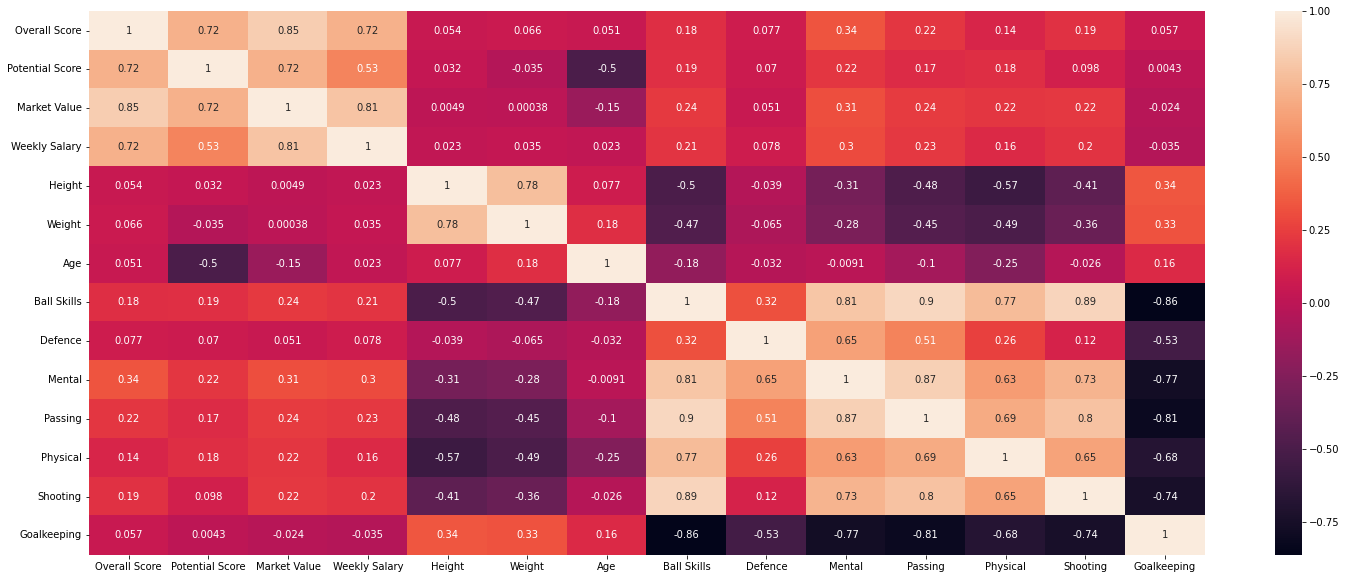

In [88]:
corr=player.corr()
plt.figure(figsize=[25,10])
sns.heatmap(corr,annot=True)

In [89]:
X=player.drop(['Height','Weight','Preferred Foot','Market Value','Player'],axis=1)

In [90]:
y=player['Market Value']

In [91]:
X

,Overall Score,Potential Score,Weekly Salary,Age,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
0,94,94,560000.0,33,96.5,32.000000,77.833333,90.666667,82.000000,86.875,10.8
1,93,93,400000.0,35,90.5,28.000000,76.666667,81.333333,85.000000,87.500,11.6
2,92,92,290000.0,28,95.5,31.333333,75.000000,85.000000,79.142857,83.750,11.8
3,91,92,245000.0,29,73.5,90.666667,77.333333,71.666667,74.857143,65.125,11.6
4,91,93,125000.0,27,21.0,19.000000,47.500000,32.000000,59.428571,18.500,87.2
...,...,...,...,...,...,...,...,...,...,...,...
5959,70,70,3200.0,38,65.5,67.666667,66.000000,61.333333,55.857143,61.875,11.8
5960,69,79,5300.0,23,51.5,68.000000,56.666667,46.333333,67.142857,33.125,12.4
5961,69,82,2100.0,19,61.5,67.000000,57.833333,53.666667,62.285714,44.125,10.0
5962,69,81,4300.0,20,67.5,28.000000,56.166667,59.333333,70.714286,60.625,10.2


In [92]:
y

0        95500000.0
1        58500000.0
2       105500000.0
3        90000000.0
4        77500000.0
           ...     
5959       275000.0
5960      1500000.0
5961      1700000.0
5962      1800000.0
5963      1300000.0
Name: Market Value, Length: 5851, dtype: float64

In [93]:
# scaling the columns
from sklearn.preprocessing import MinMaxScaler
x = X.values
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
X_new = pd.DataFrame(scaled_x, columns = X.columns)

In [94]:
# checking skewness
X_new.skew(axis = 0, skipna = True)

Overall Score      1.324204
Potential Score    0.706764
Weekly Salary      5.255223
Age                0.177488
Ball Skills       -1.811319
Defence           -0.427597
Mental            -1.217702
Passing           -1.538881
Physical          -1.176813
Shooting          -1.071795
Goalkeeping        2.811066
dtype: float64

In [95]:
X_new

,Overall Score,Potential Score,Weekly Salary,Age,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
0,1.00,0.96,1.000000,0.64,1.000000,0.281633,0.870523,0.979757,0.913953,0.991653,0.112903
1,0.96,0.92,0.713518,0.72,0.932584,0.232653,0.851240,0.866397,0.962791,1.000000,0.122120
2,0.92,0.88,0.516562,0.44,0.988764,0.273469,0.823691,0.910931,0.867442,0.949917,0.124424
3,0.88,0.88,0.435989,0.48,0.741573,1.000000,0.862259,0.748988,0.797674,0.701169,0.122120
4,0.88,0.92,0.221128,0.40,0.151685,0.122449,0.369146,0.267206,0.546512,0.078464,0.993088
...,...,...,...,...,...,...,...,...,...,...,...
5846,0.04,0.00,0.003044,0.84,0.651685,0.718367,0.674931,0.623482,0.488372,0.657763,0.124424
5847,0.00,0.36,0.006804,0.24,0.494382,0.722449,0.520661,0.441296,0.672093,0.273790,0.131336
5848,0.00,0.48,0.001074,0.08,0.606742,0.710204,0.539945,0.530364,0.593023,0.420701,0.103687
5849,0.00,0.44,0.005013,0.12,0.674157,0.232653,0.512397,0.599190,0.730233,0.641068,0.105991


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# splitting the data into sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

In [98]:
X_train

,Overall Score,Potential Score,Weekly Salary,Age,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
5493,0.04,0.00,0.007341,0.52,0.707865,0.363265,0.523416,0.728745,0.716279,0.734558,0.112903
5415,0.04,0.04,0.009848,0.56,0.106742,0.097959,0.176309,0.198381,0.413953,0.232053,0.792627
5528,0.04,0.04,0.013787,0.40,0.634831,0.351020,0.528926,0.542510,0.730233,0.621035,0.131336
3791,0.12,0.20,0.074306,0.40,0.713483,0.183673,0.639118,0.631579,0.713953,0.717863,0.101382
4306,0.08,0.12,0.016115,0.28,0.747191,0.118367,0.333333,0.481781,0.690698,0.691152,0.105991
...,...,...,...,...,...,...,...,...,...,...,...
1807,0.24,0.20,0.024172,0.60,0.730337,0.759184,0.765840,0.700405,0.888372,0.654424,0.105991
5475,0.04,0.20,0.007520,0.32,0.606742,0.742857,0.570248,0.672065,0.637209,0.429048,0.064516
2491,0.20,0.20,0.011280,0.52,0.101124,0.089796,0.272727,0.251012,0.513953,0.111853,0.827189
3951,0.12,0.08,0.016115,0.68,0.724719,0.175510,0.691460,0.574899,0.730233,0.707846,0.112903


In [99]:
X_test

,Overall Score,Potential Score,Weekly Salary,Age,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
4243,0.08,0.36,0.017905,0.20,0.567416,0.751020,0.564738,0.538462,0.627907,0.320534,0.089862
4505,0.08,0.08,0.002149,0.40,0.702247,0.444898,0.606061,0.773279,0.774419,0.621035,0.135945
5328,0.04,0.16,0.003581,0.32,0.691011,0.718367,0.619835,0.724696,0.718605,0.559265,0.108295
4619,0.08,0.32,0.040286,0.32,0.679775,0.742857,0.732782,0.736842,0.686047,0.564274,0.112903
4625,0.08,0.08,0.010922,0.40,0.702247,0.318367,0.575758,0.566802,0.783721,0.652755,0.089862
...,...,...,...,...,...,...,...,...,...,...,...
4982,0.04,0.32,0.009132,0.20,0.747191,0.220408,0.413223,0.708502,0.751163,0.609349,0.129032
461,0.44,0.52,0.056401,0.32,0.859551,0.195918,0.633609,0.829960,0.758140,0.749583,0.115207
2747,0.16,0.16,0.034020,0.40,0.702247,0.436735,0.556474,0.672065,0.848837,0.609349,0.082949
4620,0.08,0.24,0.030439,0.36,0.713483,0.681633,0.669421,0.744939,0.848837,0.569282,0.126728


In [100]:
y_train

5603    1700000.0
5523    1400000.0
5638    2100000.0
3867    4000000.0
4389    3000000.0
          ...    
1849    5500000.0
5584    2100000.0
2541    4600000.0
4030    2500000.0
4961    1200000.0
Name: Market Value, Length: 4680, dtype: float64

In [101]:
y_test

4326     3200000.0
4592     2700000.0
5433     2000000.0
4708     3000000.0
4714     2800000.0
           ...    
5084     2700000.0
470     19000000.0
2803     4800000.0
4709     2800000.0
587     12500000.0
Name: Market Value, Length: 1171, dtype: float64

In [102]:
# for linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)
lin_pred

array([ 3537806.73827367,  1231724.13705698,   211314.83317247, ...,
        6058380.48854094,  3048431.81274624, 12833949.53497888])

In [103]:
# coefficients
print("Coefficients: \n", linreg.coef_)

Coefficients: 
 [32517587.27981622  1183241.28607852 58403152.73423924 -8310906.21298346
 -3266161.28369307 -1673606.46092842 -1127280.82399068  1199965.25025243
  2298944.75050708   324217.93103587 -2902451.91417868]


In [104]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lin_pred))

Mean squared error: 9920210580896.77


In [105]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, lin_pred))

Coefficient of determination: 0.84


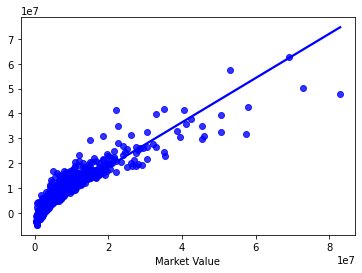

In [106]:
sns.regplot(x=y_test, y=lin_pred, ci=None, color="b")

In [107]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pol_features = PolynomialFeatures(degree = 3)
pol = LinearRegression()

pol_model = Pipeline(steps = [("polyFeature", pol_features), ("regressor", pol)])
pol_model.fit(X_train, y_train)

pol_pred = pol_model.predict(X_test)
pol_pred

array([ 3203030.63307289,  2858034.18367832,  2057635.31363714, ...,
        4756386.75304135,  3172513.71998959, 12216348.78634137])

In [108]:
# coefficients
print("Coefficients: \n", pol_model.named_steps['regressor'].coef_)

Coefficients: 
 [-3.12096344e-07 -1.21387762e+06  7.61509098e+06  2.30931648e+08
  2.13320083e+07  9.36710453e+06  2.05888488e+07  1.02017692e+07
 -5.84460315e+07 -8.23439015e+06  7.53082862e+07  5.74277870e+07
 -1.84727385e+07 -1.87869460e+07  2.00359772e+08  9.75653988e+07
 -3.46296641e+07  1.76203761e+07 -5.18466714e+07  1.00048041e+08
 -2.15396308e+07  1.23969958e+07  3.80007018e+06 -1.64146203e+07
  2.37658084e+08 -4.63306796e+07  2.15739193e+07 -1.05431974e+07
  3.32087173e+07 -1.16209546e+07  2.09159744e+07 -4.75819697e+07
  1.56404002e+07 -1.10789926e+07  2.40442762e+08 -3.66408345e+08
 -5.58122106e+07 -2.09230181e+08 -4.21306559e+08  8.06483393e+07
  8.82114135e+07 -6.15447222e+08 -1.67429500e+07 -1.59084595e+07
 -2.26074733e+07  8.62559103e+06  2.57494814e+07  6.99922837e+06
 -4.50905457e+07 -3.49223332e+07 -4.66880082e+07 -3.17544979e+07
 -3.19137256e+07  1.68371938e+08  1.29403639e+07 -3.36400822e+07
  2.13046028e+07  2.07676454e+07 -3.65746386e+07  2.32731426e+07
  1.81503

In [109]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pol_pred))

Mean squared error: 499890819238.38


In [110]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, pol_pred))

Coefficient of determination: 0.99


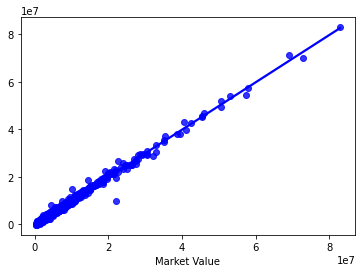

In [111]:
sns.regplot(x=y_test, y=pol_pred, ci=None, color="b")

In [112]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_features = 11)
dtr_model = Pipeline(steps = [("regressor", dtr)])
dtr_model.fit(X_train, y_train)
dtr_pred = dtr_model.predict(X_test)
dtr_pred

array([ 3200000.,  2800000.,  2200000., ...,  4700000.,  2800000.,
       11000000.])

In [113]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, dtr_pred))

Mean squared error: 2392466374893.25


In [114]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, dtr_pred))

Coefficient of determination: 0.96


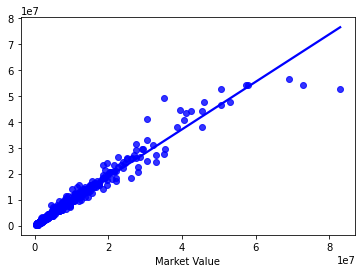

In [115]:
sns.regplot(x=y_test, y=dtr_pred, ci=None, color="b")

In [116]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 100, max_depth = 15, random_state = 4)
rf_model = Pipeline(steps = [("regressor", rfreg)])
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred

array([ 3215666.66666667,  2802333.7003767 ,  2109588.72840123, ...,
        4696475.42476563,  3020621.06620351, 10985000.        ])

In [117]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_pred))

Mean squared error: 775354804809.87


In [118]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, rf_pred))

Coefficient of determination: 0.99


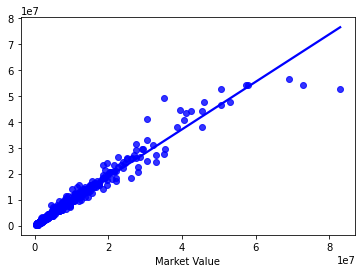

In [119]:
sns.regplot(x=y_test, y=dtr_pred, ci=None, color="b")

In [120]:
# Lasso regression
from sklearn import linear_model
las = linear_model.Lasso(alpha = 0.1)
las.fit(X_train, y_train)
las_pred = las.predict(X_test)
las_pred

array([ 3537807.68151789,  1231717.79387194,   211314.36739449, ...,
        6058373.14994236,  3048430.50152932, 12833945.26012715])

In [121]:
# coefficients
print("Coefficients: \n", las.coef_)

Coefficients: 
 [32517579.30984416  1183240.49216327 58403108.64847254 -8310899.11328369
 -3266050.64235152 -1673596.73821377 -1127249.73653633  1199903.37332771
  2298925.14455407   324192.96345723 -2902407.30804892]


In [122]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, las_pred))

Mean squared error: 9920209484828.94


In [123]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, las_pred))

Coefficient of determination: 0.84


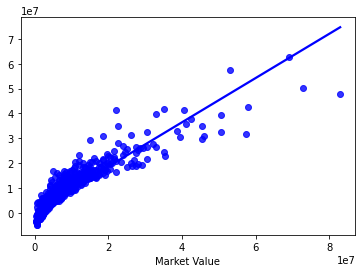

In [124]:
sns.regplot(x=y_test, y=las_pred, ci=None, color="b")

In [125]:
# Elastic Net
from sklearn.linear_model import ElasticNet
el = ElasticNet(random_state = 0)
el.fit(X_train, y_train)
el_pred = el.predict(X_test)
el_pred

array([6641466.12256391, 6412144.58554597, 6468000.26569343, ...,
       6697630.72528927, 6838625.04084433, 8021391.68977278])

In [126]:
# coefficients
print("Coefficients: \n", el.coef_)

Coefficients: 
 [2018073.20654448 2100378.55474217  760390.02241552 -310667.89874395
  554219.72313488   91627.62693858  682694.03163438  526978.98160709
  408272.18281866  568899.16487875   75869.48121176]


In [127]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, el_pred))

Mean squared error: 50524091699050.82


In [128]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, el_pred))

Coefficient of determination: 0.17


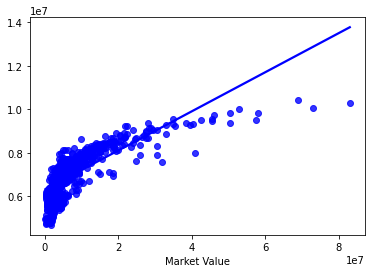

In [129]:
sns.regplot(x=y_test, y=el_pred, ci=None, color="b")

In [130]:
# Ridge regression
ridge = linear_model.Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_pred

array([ 3526290.95405669,  1230507.93451347,   215763.22436194, ...,
        5995716.77254311,  3048183.14349063, 12947125.24245176])

In [131]:
# coefficients
print("Coefficients: \n", ridge.coef_)

Coefficients: 
 [32587887.79691271  1710089.73562625 55373640.71829033 -7938268.94436345
 -2941733.45107919 -1658758.19881158  -977227.45746589  1135504.56263785
  2298789.90043629   307736.55963427 -2679618.02905651]


In [132]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ridge_pred))

Mean squared error: 9876187443195.63


In [133]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, ridge_pred))

Coefficient of determination: 0.84


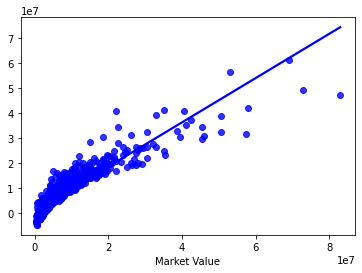

In [134]:
sns.regplot(x=y_test, y=ridge_pred, ci=None, color="b")

In [135]:
# Support vector regression with linear kernel
from sklearn import svm
svr = svm.SVR(kernel = "linear")
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_pred

array([4199853.14983034, 4199782.65383875, 4199822.28901263, ...,
       4199852.37935429, 4199919.89732778, 4200244.7241548 ])

In [136]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))

Mean squared error: 66327830538535.54


In [137]:
# coefficients
print("Coefficients: \n", svr.coef_)

Coefficients: 
 [[ 493.12        589.16        107.86356312 -174.36        210.36516854
    91.82040816  217.80716253  192.6194332   136.72325581  196.40400668
   -54.18663594]]


In [138]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

Coefficient of determination: -0.10


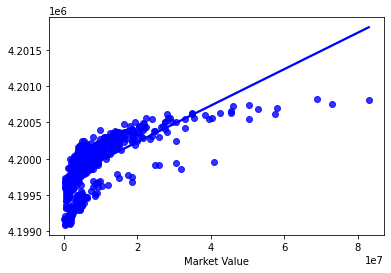

In [139]:
sns.regplot(x=y_test, y=svr_pred, ci=None, color="b")

In [140]:
# SVR with rbf kernel
svr_rbf = svm.SVR(kernel = "rbf")
svr_rbf.fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)
svr_rbf_pred

array([4199843.64618812, 4199714.01291002, 4199755.34681   , ...,
       4199807.10405678, 4199880.43005643, 4200259.1133771 ])

In [141]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_rbf_pred))

Mean squared error: 66328214774208.80


In [142]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, svr_rbf_pred))

Coefficient of determination: -0.10


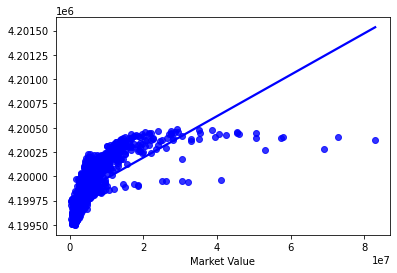

In [143]:
sns.regplot(x=y_test, y=svr_rbf_pred, ci=None, color="b")

In [144]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 0)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_pred

array([ 3497810.31670762,  2552851.64809339,  1925989.12942168, ...,
        4133470.72188244,  2929703.36570044, 11360256.11108672])

In [145]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, gbr_pred))

Mean squared error: 692303083530.20


In [146]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, gbr_pred))

Coefficient of determination: 0.99


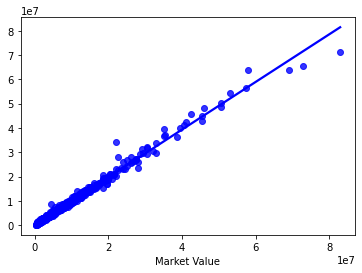

In [147]:
sns.regplot(x=y_test, y=gbr_pred, ci=None, color="b")

In [148]:
# Voting regressor that combines linear, random forest, and gradent boosting regressors
from sklearn.ensemble import VotingRegressor
lin = LinearRegression()
rf = RandomForestRegressor(random_state = 1)
gb = GradientBoostingRegressor(random_state = 1)
vot = VotingRegressor(estimators = [("gb", gb), ("rf", rf), ("lin", lin)])
vot.fit(X_train, y_train)
vot_pred = vot.predict(X_test)
vot_pred

array([ 3409539.0183271 ,  2191525.26171679,  1415434.65419805, ...,
        4962617.07014113,  2990378.39281556, 11766401.88202187])

In [149]:
# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, vot_pred))

Mean squared error: 1884953780474.62


In [150]:
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, vot_pred))

Coefficient of determination: 0.97


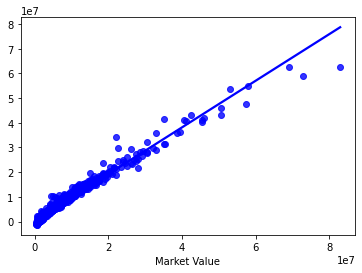

In [151]:
sns.regplot(x=y_test, y=vot_pred, ci=None, color="b")

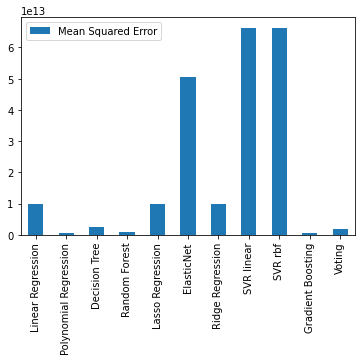

In [155]:
# Comparing the algorithms on the basis of mean squared error
mean_square_error = {"Linear Regression":mean_squared_error(y_test, lin_pred), "Polynomial Regression": mean_squared_error(y_test, pol_pred),
                          "Decision Tree": mean_squared_error(y_test, dtr_pred), "Random Forest": mean_squared_error(y_test, rf_pred),
                          "Lasso Regression": mean_squared_error(y_test, las_pred), "ElasticNet": mean_squared_error(y_test, el_pred),
                          "Ridge Regression": mean_squared_error(y_test, ridge_pred), "SVR linear": mean_squared_error(y_test, svr_pred),
                          "SVR rbf": mean_squared_error(y_test, svr_rbf_pred), "Gradient Boosting": mean_squared_error(y_test, gbr_pred),
                          "Voting": mean_squared_error(y_test, vot_pred)}

mean_square_compare = pd.DataFrame(mean_square_error, index = ["Mean Squared Error"])

mean_square_compare.T.plot.bar()

###We find that Polynomial regression, random forest and gradient boosting have the least mean squared error values. To get the best algorithm, R2 score comparison is also conducted.

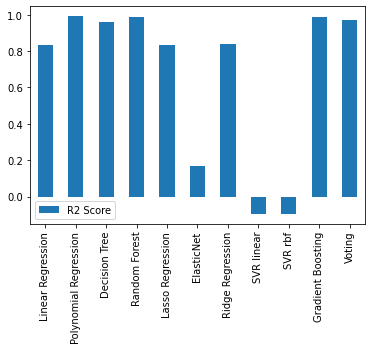

In [157]:
# Comparing the coefficient of determination i.e. r2 score

r2 = {"Linear Regression":r2_score(y_test, lin_pred), "Polynomial Regression": r2_score(y_test, pol_pred),
                          "Decision Tree": r2_score(y_test, dtr_pred), "Random Forest": r2_score(y_test, rf_pred),
                          "Lasso Regression": r2_score(y_test, las_pred), "ElasticNet": r2_score(y_test, el_pred),
                          "Ridge Regression": r2_score(y_test, ridge_pred), "SVR linear": r2_score(y_test, svr_pred),
                          "SVR rbf": r2_score(y_test, svr_rbf_pred), "Gradient Boosting": r2_score(y_test, gbr_pred),
                          "Voting": r2_score(y_test, vot_pred)}

r2_score_compare = pd.DataFrame(r2, index = ["R2 Score"])

r2_score_compare.T.plot.bar()


###We find that all the 3 best algorithms have the same R2 score. So for our task, we can implement any of these 3 algorithms.